In [4]:
# deepchem 공식문서  


!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e
!pip install --pre deepchem
import deepchem
deepchem.__version__

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3457  100  3457    0     0  82309      0 --:--:-- --:--:-- --:--:-- 82309


add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.12
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing openmm, pdbfixer
added conda-forge to channels
done
conda packages installation finished!


# conda environments:
#
base                  *  /root/miniconda

     |████████████████████████████████| 608 kB 7.9 MB/s 
     |████████████████████████████████| 20.6 MB 1.4 MB/s 


'2.6.0.dev'

In [5]:
#deepchem 구글 코랩 환경에 설치

! pip install deepchem  
!wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv # 데이터 불러오기
! pip install tensorflow~=2.4


--2021-12-02 07:09:32--  https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96699 (94K) [text/plain]
Saving to: ‘delaney-processed.csv’

delaney-processed.c 100%[===================>]  94.43K  --.-KB/s    in 0.01s   

2021-12-02 07:09:32 (8.79 MB/s) - ‘delaney-processed.csv’ saved [96699/96699]



In [6]:
# rdkit 설치 파일형식으 데이터 --> 구조이미지로 만들어 주는 툴
!pip install kora


     |████████████████████████████████| 57 kB 3.9 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 


In [7]:
import deepchem 
import kora.install.rdkit

In [8]:
# 데이터 셋 불러오기

from deepchem.utils.save import load_from_disk
dataset_file= "delaney-processed.csv"

# Loading the data from the CSV file
loader = deepchem.data.CSVLoader(tasks=["ESOL predicted log solubility in mols per litre"], 
                                 smiles_field="smiles", 
                                 featurizer=deepchem.feat.ConvMolFeaturizer())
# Featurizing the dataset with ConvMolFeaturizer
dataset = loader.featurize(dataset_file)

deepchem.utils.save has been deprecated.
The utilities in save.py are moved to deepchem.utils.data_utils or deepchem.utils.genomics_utils.
smiles_field is deprecated and will be removed in a future version of DeepChem.Use feature_field instead.
/usr/local/lib/python3.7/dist-packages/deepchem/data/data_loader.py:163: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  "featurize() will be removed in DeepChem 3.0", FutureWarning)


In [9]:
# https://deepchem.readthedocs.io/en/latest/api_reference/data.html#diskdataset
"""
data_dir (str) – Data directory to write shard to.

basename (str) – Basename for the shard in question.

X (np.ndarray, optional (default None)) – The features array.

y (np.ndarray, optional (default None)) – The labels array.

w (np.ndarray, optional (default None)) – The weights array.

ids (np.ndarray, optional (default None)) – The identifiers array.
"""
print(type(dataset))
display(dataset.to_dataframe())

<class 'deepchem.data.datasets.DiskDataset'>


,X,y,w,ids
0,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.974,1.0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.885,1.0,Cc1occc1C(=O)Nc2ccccc2
2,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.579,1.0,CC(C)=CCCC(C)=CC(=O)
3,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-6.618,1.0,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.232,1.0,c1ccsc1
...,...,...,...,...
1123,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.608,1.0,FC(F)(F)C(Cl)Br
1124,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.908,1.0,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-3.323,1.0,CCSCCSP(=S)(OC)OC
1126,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.245,1.0,CCC(C)C


In [10]:
#데이터셋 판다스로 불러오기

import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv')
data.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


ESOL(Estimated SOLubility) : https://www.moreisdifferent.com/assets/DIY_drug_discovery/Delaney_paper.pdf



In [11]:
print("Columns of dataset: %s" % str(data.columns.values))
print("Number of examples in dataset: %s" % str(data.shape))

Columns of dataset: ['Compound ID' 'ESOL predicted log solubility in mols per litre'
 'Minimum Degree' 'Molecular Weight' 'Number of H-Bond Donors'
 'Number of Rings' 'Number of Rotatable Bonds' 'Polar Surface Area'
 'measured log solubility in mols per litre' 'smiles']
Number of examples in dataset: (1128, 10)


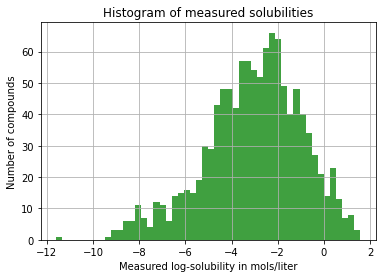

In [12]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

solubilities = data["measured log solubility in mols per litre"]
plt.hist(solubilities, 50, facecolor='green', alpha=0.75)
plt.xlabel('Measured log-solubility in mols/liter')
plt.ylabel('Number of compounds')
plt.title(r'Histogram of measured solubilities')
plt.grid(True)
plt.show()

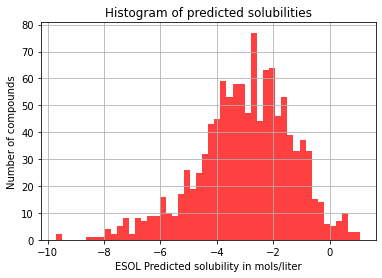

In [13]:
solubilities = data["ESOL predicted log solubility in mols per litre"]
plt.hist(solubilities, 50, facecolor='red', alpha=0.75)
plt.xlabel('ESOL Predicted solubility in mols/liter')
plt.ylabel('Number of compounds')
plt.title(r'Histogram of predicted solubilities')
plt.grid(True)
plt.show()

In [14]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
df = data[["ESOL predicted log solubility in mols per litre","measured log solubility in mols per litre"]]
df['difference'] = (data["ESOL predicted log solubility in mols per litre"] - data["measured log solubility in mols per litre"]).abs()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ESOL predicted log solubility in mols per litre,measured log solubility in mols per litre,difference
0,-0.974,-0.770,0.204
1,-2.885,-3.300,0.415
2,-2.579,-2.060,0.519
3,-6.618,-7.870,1.252
4,-2.232,-1.330,0.902
...,...,...,...
1123,-2.608,-1.710,0.898
1124,-0.908,0.106,1.014
1125,-3.323,-3.091,0.232
1126,-2.245,-3.180,0.935


귀무 가설 : 두 데이터는 정규분포를 따르며 두 집단간의 평균차이가 없다

대안 가설 : 두 데이터는 정규분포를 따르지 않으며 두 집단간의 평균차이가 있다.

In [16]:
pv = stats.ttest_ind(data["ESOL predicted log solubility in mols per litre"], data["measured log solubility in mols per litre"]).pvalue
print(pv)

# p_value값이 0.05보다 월등히 크므로 귀무 가설을 기각 하지 않고 정규 분포를 따르며 두 집단간의 평균차이가 없음을 알 수 있다.

0.4393770342209081


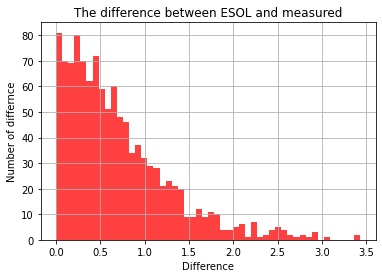

In [17]:
# data["ESOL predicted log solubility in mols per litre"] - data["measured log solubility in mols per litre"]
plt.hist(df['difference'], 50, facecolor='red', alpha=0.75)
plt.xlabel('Difference')
plt.ylabel('Number of differnce')
plt.title(r'The difference between ESOL and measured')
# plt.subtitle("")
plt.grid(True)
plt.show()

각 데이터 간의 차이도 작은 수준에 훨씬 많이 분포 되어 있는 것을 알 수 있다.

결론 : 용해도를 실제로 측정한 값과 화합물의 구조를 통해 측정한 값의 차이가 크게 의미가 없음을 알 수 있다.

In [18]:
import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice
from IPython.display import Image, display

def display_images(filenames):
    """Helper to pretty-print images."""
    for file in filenames:
      display(Image(file))

def mols_to_pngs(mols, basename="test"):
    """Helper to write RDKit mols to png files."""
    filenames = []
    for i, mol in enumerate(mols):
        filename = "%s%d.png" % (basename, i)
        Draw.MolToFile(mol, filename)
        filenames.append(filename)
    return filenames

SMILES 데이터를 이미지 데이터로 바꾸어 살펴보기

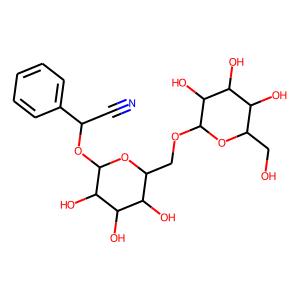

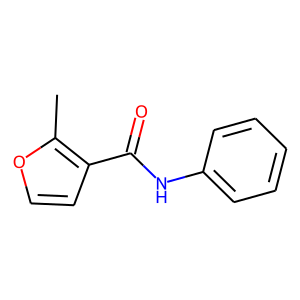

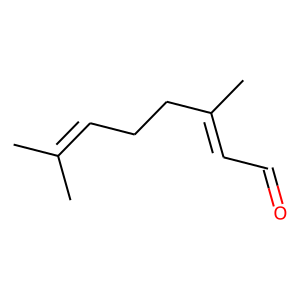

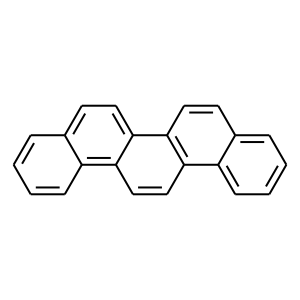

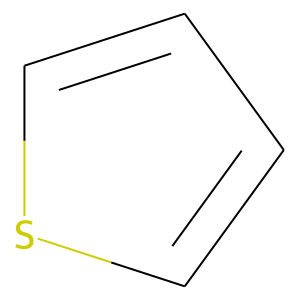

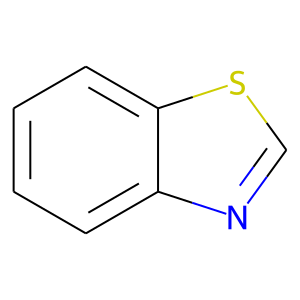

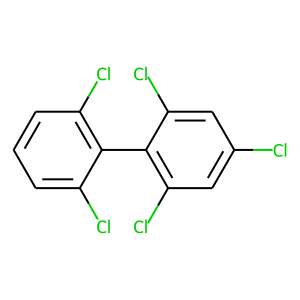

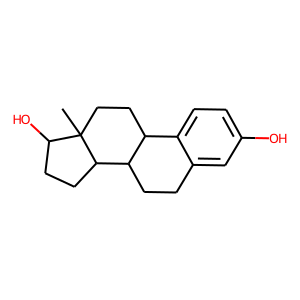

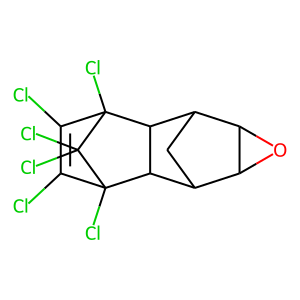

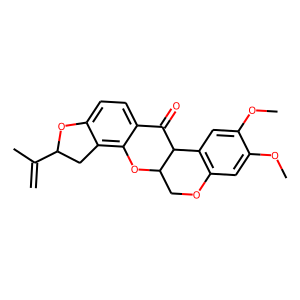

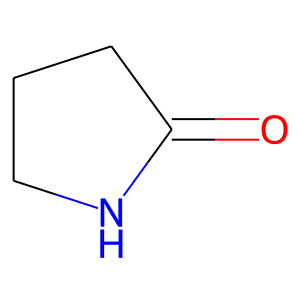

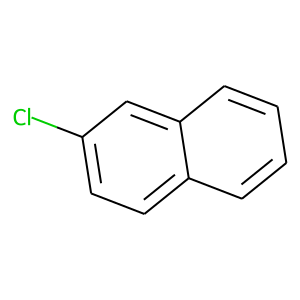

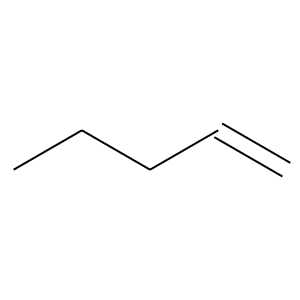

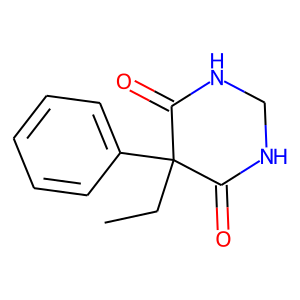

In [19]:
# smiles --> image 변환 
num_to_display = 14
molecules = []
for _, data in islice(data.iterrows(), num_to_display):
  molecules.append(Chem.MolFromSmiles(data["smiles"]))
display_images(mols_to_pngs(molecules))

In [22]:
# Splitter splits the dataset 
# In this case it's is an equivalent of train_test_split from sklearn


splitter = deepchem.splits.RandomSplitter()
# frac_test is 0.01 because we only use a train and valid as an example
train, valid, test = splitter.train_valid_test_split(dataset,
                                                      frac_train=0.7,
                                                      frac_valid=0.29,
                                                      frac_test=0.01)

"""
from sklearn.model_selection import train_test_split
x = dataset.to_dataframe()['ids']
y = dataset.to_dataframe()['y']

train_x, test_x ,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=42)
"""
"""
# Normalizer will normalize y values in the dataset
normalizer = deepchem.trans.NormalizationTransformer(transform_y=True, 
                                                         dataset=train, 
                                                         move_mean=True)
train = normalizer.transform(train)
valid = normalizer.transform(valid)
"""

'\n# Normalizer will normalize y values in the dataset\nnormalizer = deepchem.trans.NormalizationTransformer(transform_y=True, \n                                                         dataset=train, \n                                                         move_mean=True)\ntrain = normalizer.transform(train)\nvalid = normalizer.transform(valid)\n'

In [23]:
"""
deepchem내의 graphconv의 Parameter

n_tasks (int) – Number of tasks
graph_conv_layers (list of int) – Width of channels for the Graph Convolution Layers
dense_layer_size (int) – Width of channels for Atom Level Dense Layer after GraphPool
dropout (list or float) – the dropout probablity to use for each layer. The length of this list should equal len(graph_conv_layers)+1 (one value for each convolution layer, and one for the dense layer). Alternatively this may be a single value instead of a list, in which case the same value is used for every layer.
mode (str) – Either “classification” or “regression”
number_atom_features (int) – 75 is the default number of atom features created, but this can vary if various options are passed to the function atom_features in graph_features
n_classes (int) – the number of classes to predict (only used in classification mode)
batch_normalize (True) – if True, apply batch normalization to model
uncertainty (bool) – if True, include extra outputs and loss terms to enable the uncertainty in outputs to be predicted

"""

'\ndeepchem내의 graphconv의 Parameter\n\nn_tasks (int) – Number of tasks\ngraph_conv_layers (list of int) – Width of channels for the Graph Convolution Layers\ndense_layer_size (int) – Width of channels for Atom Level Dense Layer after GraphPool\ndropout (list or float) – the dropout probablity to use for each layer. The length of this list should equal len(graph_conv_layers)+1 (one value for each convolution layer, and one for the dense layer). Alternatively this may be a single value instead of a list, in which case the same value is used for every layer.\nmode (str) – Either “classification” or “regression”\nnumber_atom_features (int) – 75 is the default number of atom features created, but this can vary if various options are passed to the function atom_features in graph_features\nn_classes (int) – the number of classes to predict (only used in classification mode)\nbatch_normalize (True) – if True, apply batch normalization to model\nuncertainty (bool) – if True, include extra output

In [24]:
# https://deepchem.readthedocs.io/en/latest/api_reference/models.html?highlight=GraphConvModel#graphconvmodel

from deepchem.models import GraphConvModel
graph_conv = GraphConvModel(1,
                            batch_size=50,
                            mode="regression")
# Defining metric. Closer to 1 is better
metric = deepchem.metrics.Metric(deepchem.metrics.pearson_r2_score)

In [27]:
# Fitting the model
graph_conv.fit(train, nb_epoch=50)

# Reversing the transformation and getting the metric scores on 2 datasets
train_scores = graph_conv.evaluate(train, [metric])
valid_scores = graph_conv.evaluate(valid, [metric])

In [28]:
print("train_scores :",train_scores) 
print("valid_scores :",valid_scores) 

train_scores : {'pearson_r2_score': 0.9913797174994095}
valid_scores : {'pearson_r2_score': 0.8457298521005786}


In [29]:
display(test.to_dataframe())
display(train.to_dataframe())

,X,y,w,ids
0,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-5.168,1.0,Clc1cc(Cl)c(Cl)c(Cl)c1Cl
1,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.156,1.0,ClCCl
2,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-3.738,1.0,CCOC(=O)N(C)C(=O)CSP(=S)(OCC)OCC
3,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.446,1.0,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
4,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.531,1.0,c1ccc2cnccc2c1
5,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-3.063,1.0,CCCC(C)C1(CC=C)C(=O)NC(=S)NC1=O
6,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-3.802,1.0,Cc1cccc2ccccc12
7,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.123,1.0,CN(C)C(=O)C
8,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-4.417,1.0,CC(=O)OC3(CCC4C2C=C(C)C1=CC(=O)CCC1(C)C2CCC34C...
9,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.240,1.0,Cc2cnc1cncnc1n2


,X,y,w,ids
0,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.553,1.0,Cc1c(cccc1N(=O)=O)N(=O)=O
1,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.490,1.0,CCNc1nc(Cl)nc(NC(C)(C)C#N)n1
2,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.463,1.0,CC(C)COC(=O)C
3,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.590,1.0,Oc1ccc(O)cc1
4,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.532,1.0,CC1CC(C)C(=O)C(C1)C(O)CC2CC(=O)NC(=O)C2
...,...,...,...,...
784,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.195,1.0,c2ccc1NCCc1c2
785,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-3.099,1.0,FC(F)(F)c1ccccc1
786,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-4.424,1.0,Cc1ccc(cc1)c2ccccc2
787,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.689,1.0,CSc1nc(nc(n1)N(C)C)N(C)C


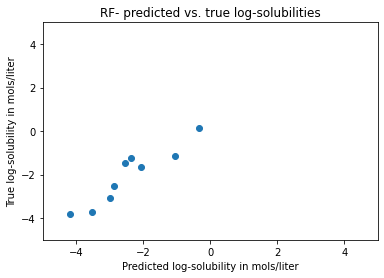

In [30]:
task = "measured log solubility in mols per litre"
predicted_test = graph_conv.predict(test)
true_test = test.y
plt.scatter(predicted_test, true_test)
plt.xlabel('Predicted log-solubility in mols/liter')
plt.ylabel('True log-solubility in mols/liter')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title(r'RF- predicted vs. true log-solubilities')
plt.show()

In [31]:
graph_conv.predict(test)

array([[-5.8312225 ],
       [-1.0409616 ],
       [-3.5361855 ],
       [-2.5529063 ],
       [-2.8690119 ],
       [-3.0076792 ],
       [-4.1775684 ],
       [-0.33072984],
       [-5.1054235 ],
       [-2.367306  ],
       [-2.0623147 ],
       [-6.741372  ]], dtype=float32)

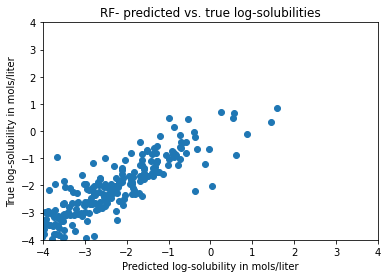

In [32]:
task = "measured log solubility in mols per litre"
predicted_test = graph_conv.predict(valid)
true_test = valid.y
plt.scatter(predicted_test, true_test)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('Predicted log-solubility in mols/liter')
plt.ylabel('True log-solubility in mols/liter')
plt.title(r'RF- predicted vs. true log-solubilities')
plt.show()

In [34]:
test_scores = graph_conv.evaluate(test, [metric],)

print("test_scores:", test_scores)

test_scores: {'pearson_r2_score': 0.9487778138392781}
